# $𝐸_{𝑡𝑜𝑡𝑎𝑙}$ & $𝐸_{𝑡𝑜𝑡𝑎𝑙}/𝐸_{0}$

In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML

from smbbh_nu import SMBBH_NU
from plot_process import Plot_Result

## 1. Parameters

In [2]:
black_hole_mass = [0.5, 0.5]  # m1, m2
radius = 2
eccentricity = 0.0
constant_c = 0.0
t0, tf = 0, 50
angles = [np.pi/6, np.pi/4, np.pi/6]  # omega, I, Omega

## 2. Potential

In [3]:
def potential_1(constant_c, comp_vector, r):
    c_term = (constant_c*comp_vector) / r
    first_term = 1/(r + r**3)
    second_term = np.arctan(r)/(r**2)
    V = c_term*(first_term - second_term)
    return V

## 3. Run

In [4]:
experiment_1 = SMBBH_NU(black_hole_mass,
                        t0=t0,
                        tf=tf,
                        constant_c=constant_c,
                        radius=radius,
                        eccentricity=eccentricity,
                        angles=angles,
                        potential_function=potential_1)

In [5]:
exp_dict = experiment_1.run()

## 4. Plot

In [6]:
# rot_command = str(input("Would you like to rotate the binary black hole orbit trajectory in 3D? [y]/n : "))
rot_command = "n"
rot_mod = "rotation" if rot_command == "y" else "no_rotation"
plot = Plot_Result(exp_dict, radius, t0, tf)

### 4-1. Orbit

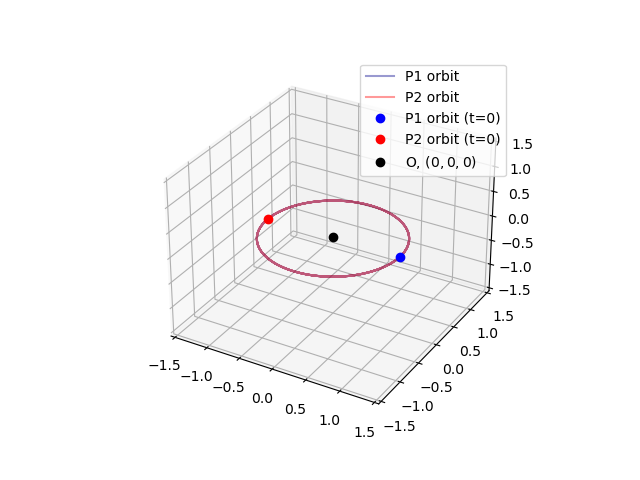

In [7]:
plot.plot_rk4_result(mode=rot_mod)

In [8]:
# ani = plot.plot_orbit_video(mode=rot_mod, show_mode='html')
# plt.close()
# HTML(ani.to_jshtml(fps=10))

### 4-2. $E_{total}$

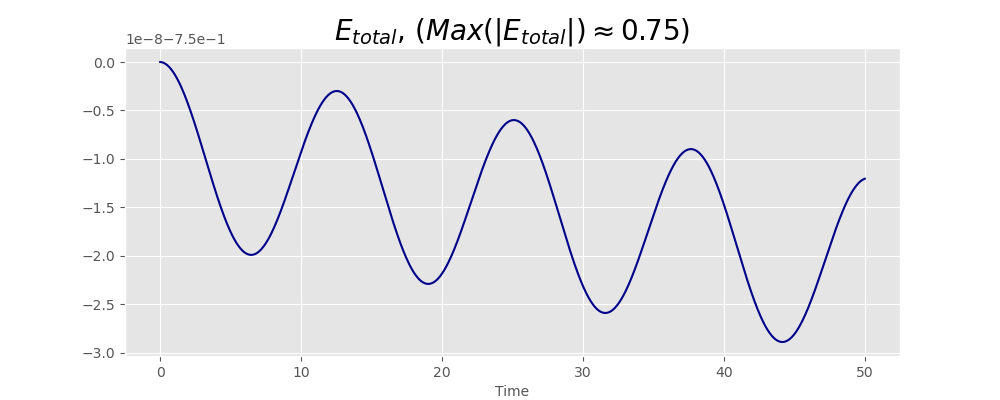

In [9]:
plot.plot_total_energy(mode=rot_mod)

### 4-3. $E_{total}/E_{0}$

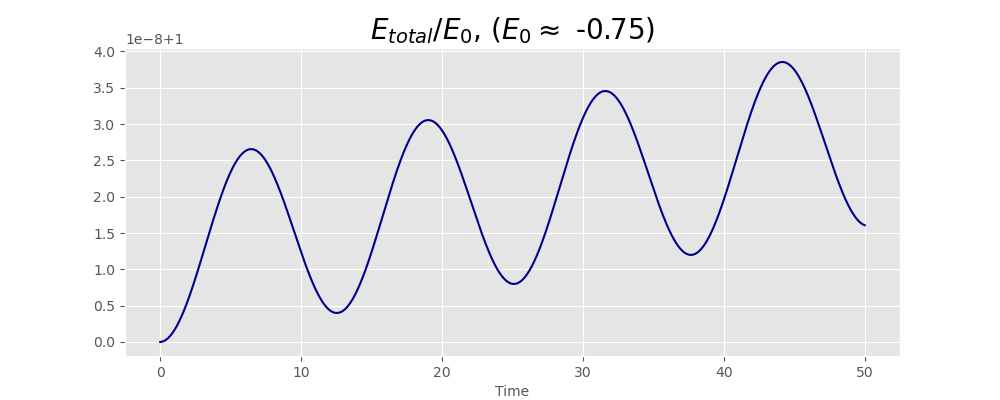

In [10]:
plot.plot_total_energy_divid_initE(mode=rot_mod)